<a href="https://colab.research.google.com/github/Nkanga-Pedro/Nkanga-Pedro/blob/main/TrabAAKModesENAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIPIFICAÇÃO NO DESEMPENHO DE ESTUDANTE ATRAVES DOS DADOS DO ENADE

Utilizei o Clustering KModes que é um dos algoritmos não supervisionados de Machine Learning usados para cluster variáveis categóricas, a escolha desse algoritmo por ter variaveis categoricas.

Não escolhi o KMeans porque usa medidas matemáticas ( distância ) para agrupar dados contínuos. Quanto menor a distância, mais semelhantes são nossos pontos de dados. Os centróides são atualizados por meios. Mas para pontos de dados categóricos, não podemos calcular a distância. Então, optei pelo algoritmo KModes. Ele usa as diferenças ( incompatibilidades totais ) entre os pontos de dados. Quanto menores as dissimilaridades, mais semelhantes são nossos pontos de dados. Ele usa modos em vez de meios.

Importei diferentes que vou utilizar ao longo da minha exploração

In [28]:
!pip install kmodes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from kmodes.kmodes import KModes
import numpy as np
from plotnine import *

Importei o dataset : microdados do ENADE-2019

In [3]:
# importando a base de dados - microdados_enade_2019
dados = pd.read_table('/content/drive/MyDrive/dataset/microdados_enade_2019.txt',encoding='latin-1', sep=';')

# Pré-Processamento de Dados

In [113]:
# Visualizar os dados no dataset que acabei de importar
dados.head(2)

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2019,1,10002,10028,5710,3,1,5103403,51,5,...,2.0,5.0,1.0,1.0,2.0,5.0,8.0,7.0,1.0,2.0
1,2019,1,10002,10028,5710,3,1,5103403,51,5,...,1.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,2.0,2.0


In [114]:
# Visualizar as linhas e colunas na base de dados
dados.shape

(433930, 137)

In [115]:
# Descrever os dados que tenho, isto ẽ, visualizar a media, desvio padrão, quartis entre outros
dados.describe()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,TP_PR_GER,TP_PR_OB_FG,TP_PR_DI_FG,TP_PR_OB_CE,TP_PR_DI_CE,TP_SFG_D1,TP_SFG_D2,TP_SCE_D1,TP_SCE_D2,TP_SCE_D3
count,433930.0,433930.000000,433930.000000,433930.000000,433930.000000,4.339300e+05,433930.000000,4.339300e+05,433930.000000,433930.000000,...,433930.000000,433930.000000,433930.000000,433930.000000,433930.000000,433930.000000,433930.000000,433930.000000,433930.000000,433930.000000
mean,2019.0,1626.420351,8615.828459,10024.387132,2433.396121,5.625108e+05,0.946102,3.359341e+06,33.412055,2.990837,...,521.363296,521.212885,506.761627,521.285532,511.684786,499.755836,492.213048,500.596350,499.535478,483.968647
std,0.0,2737.010677,3488.699854,3.646010,2746.891389,8.522556e+05,0.225817,9.020739e+05,9.011404,0.983905,...,100.251828,100.367719,109.984051,100.311789,107.024677,113.675285,117.075493,113.250304,120.618191,120.142501
min,2019.0,1.000000,93.000000,10019.000000,5.000000,3.000000e+00,0.000000,1.100023e+06,11.000000,1.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
25%,2019.0,349.000000,10002.000000,10020.000000,21.000000,3.923500e+04,1.000000,2.927408e+06,29.000000,2.000000,...,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,333.000000
50%,2019.0,621.000000,10005.000000,10026.000000,55.000000,1.059220e+05,1.000000,3.306305e+06,33.000000,3.000000,...,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
75%,2019.0,1753.000000,10007.000000,10028.000000,5710.000000,1.159084e+06,1.000000,4.104808e+06,41.000000,4.000000,...,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
max,2019.0,23410.000000,17634.000000,10028.000000,6410.000000,5.001378e+06,1.000000,5.300108e+06,53.000000,5.000000,...,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,666.000000,556.000000


In [116]:
# Verificar os dados que contem valor null
dados.isnull().sum()

NU_ANO            0
CO_IES            0
CO_CATEGAD        0
CO_ORGACAD        0
CO_GRUPO          0
              ...  
QE_I64        26065
QE_I65        26064
QE_I66        26067
QE_I67        26064
QE_I68        26072
Length: 137, dtype: int64

Atributos escolhido para clusterizar

Razão dessa escolha por causa desses atributos se focar no estudante, sendo ele o centro das atenções da nossa pesquisa.

'CO_MUNIC_CURSO','CO_REGIAO_CURSO','NU_IDADE','TP_SEXO','ANO_FIM_EM','ANO_IN_GRAD','NT_FG','QE_I01','QE_I02','QE_I03','QE_I04','QE_I05','QE_I06','QE_I08','QE_I11','QE_I25','QE_I29','QE_I33','QE_I37','QE_I38','QE_I39','QE_I40'

In [34]:
dados_novo=dados[['CO_UF_CURSO','CO_REGIAO_CURSO','NT_FG','NU_IDADE','TP_SEXO',
                  'QE_I01','QE_I02','QE_I03','QE_I04','QE_I05','QE_I08','QE_I11',
                  'QE_I25','QE_I29','QE_I33','QE_I37','QE_I38','QE_I39','QE_I40']]

Reduzimos os atributos de 137 para 19

In [11]:
dados_novo.shape

(433930, 19)

Transformar a nota que era tipo string para float

In [35]:
dados_novo['NT_FG'] = dados_novo['NT_FG'].astype(str)
dados_novo['NT_FG'] = dados_novo['NT_FG'].str.replace(',', '.')
dados_novo['NT_FG'] = pd.to_numeric(dados_novo['NT_FG'], errors='coerce')

Transformar os dados numericos mas que era do tipo string para numerico

In [36]:
dados_novo['QE_I29'] = pd.to_numeric(dados_novo['QE_I29'], errors='coerce')
dados_novo['QE_I33'] = pd.to_numeric(dados_novo['QE_I33'], errors='coerce')
dados_novo['QE_I37'] = pd.to_numeric(dados_novo['QE_I37'], errors='coerce')
dados_novo['QE_I38'] = pd.to_numeric(dados_novo['QE_I38'], errors='coerce')
dados_novo['QE_I39'] = pd.to_numeric(dados_novo['QE_I39'], errors='coerce')
dados_novo['QE_I40'] = pd.to_numeric(dados_novo['QE_I40'], errors='coerce')

Verificar os atributos objectos

In [37]:
dados_novo.select_dtypes(include='object').head(3)

,TP_SEXO,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I08,QE_I11,QE_I25
0,M,E,C,A,D,E,B,A,E
1,M,A,A,A,E,D,E,A,E
2,M,A,A,A,E,E,E,A,B


Verificar os atributos numericos

In [38]:
dados_novo.select_dtypes(include='number').head(3)

,CO_UF_CURSO,CO_REGIAO_CURSO,NT_FG,NU_IDADE,QE_I29,QE_I33,QE_I37,QE_I38,QE_I39,QE_I40
0,51,5,36.5,27,7.0,7.0,2.0,6.0,4.0,1.0
1,51,5,44.3,26,2.0,3.0,1.0,2.0,3.0,2.0
2,51,5,NaN,23,2.0,2.0,1.0,1.0,2.0,1.0


Verificar os valores null mas analisar o que pode se fazer com isso, concluimos para não descrepenciar os dados eliminamos em vez de atribuir valor media ou outra solução.
Motivo: Por que existe atributos que tem valor mas representa cidade ou algums motivo teorico isso pode acabar afetar o resultado

In [39]:
# Checando NAs
pd.DataFrame({"Type":dados_novo.dtypes, "Missing":dados_novo.isna().sum()})

,Type,Missing
CO_UF_CURSO,int64,0
CO_REGIAO_CURSO,int64,0
NT_FG,float64,43795
NU_IDADE,int64,0
TP_SEXO,object,0
QE_I01,object,0
QE_I02,object,0
QE_I03,object,0
QE_I04,object,0
QE_I05,object,0


In [40]:
# Elimindo as linhas que contem os valores vazios
dados_novo=dados_novo.dropna(axis=0)

# ANALISE E EXPLORAÇÃO DE DADOS

TRANSFORMAÇÃO DE DADOS PARA MELHOR VISUALIZAÇÃO

Iremos realizar algumas transformações nas variáveis, como também colocar seus rótulos.

In [41]:
dados_novo["TP_SEXO"]= dados_novo["TP_SEXO"].map({"M":"Masculino","F":"Feminino"})
dados_novo["QE_I01"]= dados_novo["QE_I01"].map({"A":"Solteiro(a)","B":"Casado(a)",
                                            "C":"Separado(a)","D":"Viúvo(a)","E":"Outro"})
dados_novo["QE_I02"]= dados_novo["QE_I02"].map({"A":"Branca","B":"Preta",
                                            "C":"Amarela","D":"Parda","E":"Indígena","F":"Não quero declarar"})
dados_novo["QE_I04"]= dados_novo["QE_I04"].map({'A':"Nenhuma", 'B':'Ensino Fundamental 1', 'C':'Ensino Fundamental 2',
                                'D':'Ensino Médio', 'E':'Ensino Superior', 'F':'Pós-graduação'})
dados_novo["QE_I05"]= dados_novo["QE_I05"].map({'A':"Nenhuma", 'B':'Ensino Fundamental 1', 'C':'Ensino Fundamental 2',
                                'D':'Ensino Médio', 'E':'Ensino Superior', 'F':'Pós-graduação'})
dados_novo["QE_I08"]= dados_novo["QE_I08"].map({"A":"Até 1,5 SM","B":"De 1,5 a 3 SM",
                                            "C":"De 3 a 4,5 SM","D":"De 4,5 a 6 SM",
                                            "E":"De 6 a 10 SM","F":"De 10 a 30 SM","G":"Acima de 30 SM"})
dados_novo["QE_I11"]= dados_novo["QE_I11"].map({'A':"Nenhum, pois meu curso é gratuito", 'B':'Nenhum, embora meu curso não seja gratuito', 'C':'ProUni integral',
                                'D':'ProUni parcial, apenas', 'E':'FIES, apenas', 'F':'ProUni Parcial e FIES', 'G':'Bolsa oferecida por governo estadual, distrital ou municipal', 
                                'H':'Bolsa oferecida pela própria instituição', 'I':'Bolsa oferecida por outra entidade (empresa, ONG, outra)', 'J':'Financiamento oferecido pela própria instituição',
                                 'K':'Financiamento bancário'})
dados_novo["QE_I25"]= dados_novo["QE_I25"].map({'A':"Inserção no mercado de trabalho", 'B':'Influência familiar', 'C':'Valorização profissional',
                                'D':'Prestígio Social', 'E':'Vocação', 'F':'Oferecido na modalidade a distância', 'G':'Baixa concorrência para ingresso', 'H':'Outro motivo'})

In [42]:
dados_novo.head(3)

,CO_UF_CURSO,CO_REGIAO_CURSO,NT_FG,NU_IDADE,TP_SEXO,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I08,QE_I11,QE_I25,QE_I29,QE_I33,QE_I37,QE_I38,QE_I39,QE_I40
0,51,5,36.5,27,Masculino,Outro,Amarela,A,Ensino Médio,Ensino Superior,"De 1,5 a 3 SM","Nenhum, pois meu curso é gratuito",Vocação,7.0,7.0,2.0,6.0,4.0,1.0
1,51,5,44.3,26,Masculino,Solteiro(a),Branca,A,Ensino Superior,Ensino Médio,De 6 a 10 SM,"Nenhum, pois meu curso é gratuito",Vocação,2.0,3.0,1.0,2.0,3.0,2.0
3,51,5,49.9,24,Masculino,Solteiro(a),Parda,A,Pós-graduação,Pós-graduação,De 6 a 10 SM,"Nenhum, pois meu curso é gratuito",Valorização profissional,3.0,5.0,3.0,2.0,3.0,3.0


Visualizar as regiões em relação aos cursos oferecidos

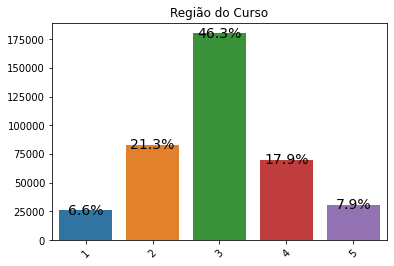

In [43]:
# Plotando variável Região do Curso
total = float(len(dados_novo["CO_REGIAO_CURSO"]))
ax=sns.countplot(dados_novo["CO_REGIAO_CURSO"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=45)
plt.title("Região do Curso")
plt.ylabel("")
plt.xlabel("")
plt.show()

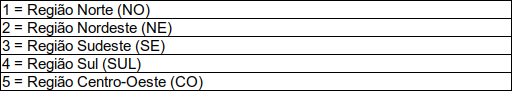

Visualizar as diferentes motivos escolhido pelos cursos

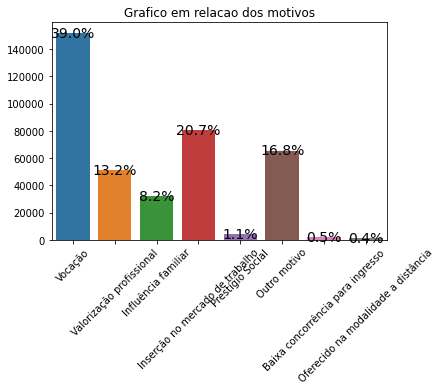

In [44]:
# Plotando variável por motivo escolhido por curso
total = float(len(dados_novo["QE_I25"]))
ax=sns.countplot(dados_novo["QE_I25"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=45)
plt.title("Grafico em relacao dos motivos")
plt.ylabel("")
plt.xlabel("")
plt.show()

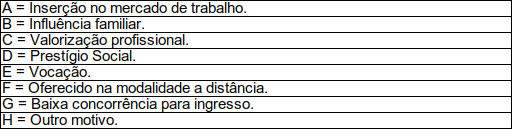

Visualizar as idades que participaram

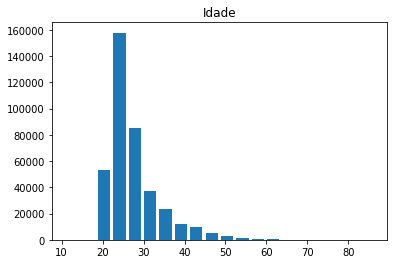

In [45]:
# Plotando a variável idade
plt.hist(dados_novo["NU_IDADE"],bins=20,histtype="bar",rwidth=.8)
plt.title("Idade")
plt.show()

Visualizar os participantes em relação ao genero

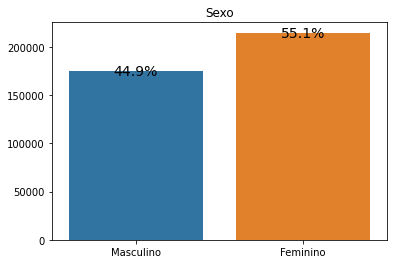

In [46]:
# Plotando a variável sexo
total = float(len(dados_novo["TP_SEXO"]))
ax=sns.countplot(dados_novo["TP_SEXO"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.title("Sexo")
plt.ylabel("")
plt.xlabel("")
plt.show()

Visualizar em relação ao estado civil

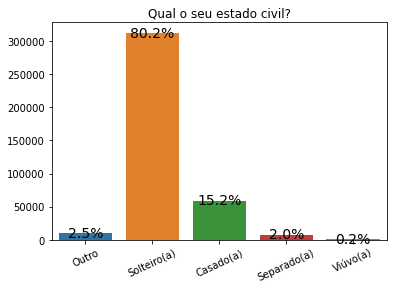

In [47]:
# Plotando a variável estado civil
total = float(len(dados_novo["QE_I01"]))
ax=sns.countplot(dados_novo["QE_I01"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=25)
plt.title("Qual o seu estado civil?")
plt.ylabel("")
plt.xlabel("")
plt.show()

Visualizar os participantes em relação a cor ou ração

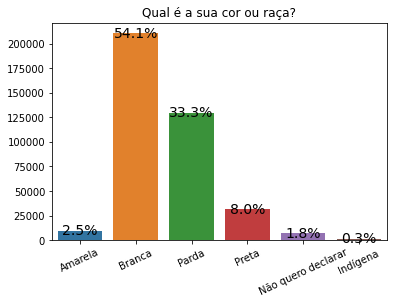

In [48]:
# Plotando a variável cor/raça
total = float(len(dados_novo["QE_I02"]))
ax=sns.countplot(dados_novo["QE_I02"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=25)
plt.title("Qual é a sua cor ou raça?")
plt.ylabel("")
plt.xlabel("")
plt.show()

Visualizar o grau de oferta de financiamnto ou bosa em diferentes participantes

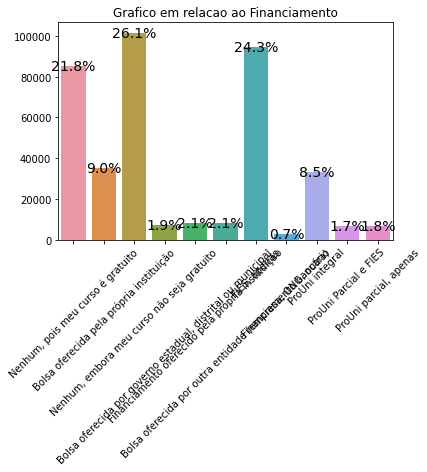

In [49]:
# Plotando variável Financiamento
total = float(len(dados_novo["QE_I11"]))
ax=sns.countplot(dados_novo["QE_I11"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=45)
plt.title("Grafico em relacao ao Financiamento")
plt.ylabel("")
plt.xlabel("")
plt.show()

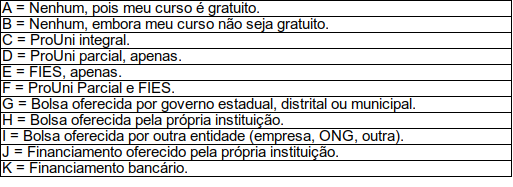

Visualizar as diferentes escolarização de pai dos participantes

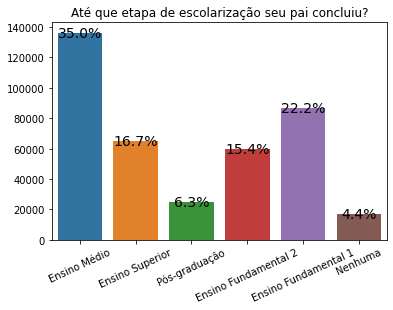

In [50]:
# Plotando a variável instrução do pai
total = float(len(dados_novo["QE_I04"]))
ax=sns.countplot(dados_novo["QE_I04"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=25)
plt.title("Até que etapa de escolarização seu pai concluiu?")
plt.ylabel("")
plt.xlabel("")
plt.show()

Visualizar diferentes escolarização da mãe dos participantes

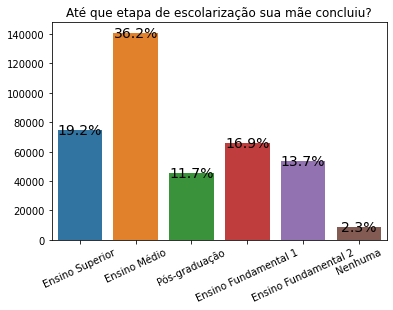

In [51]:
# Plotando a variável instrução da mãe
total = float(len(dados_novo["QE_I05"]))
ax=sns.countplot(dados_novo["QE_I05"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=25)
plt.title("Até que etapa de escolarização sua mãe concluiu?")
plt.ylabel("")
plt.xlabel("")
plt.show()

Visualizar o rendimento de cada familia nos participantes

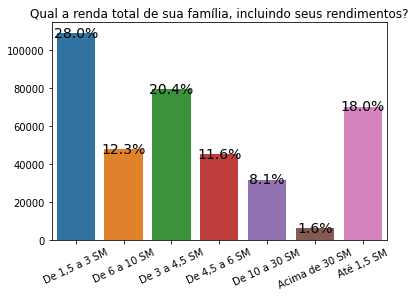

In [56]:
# Plotando a variável renda familiar
total = float(len(dados_novo["QE_I08"]))
ax=sns.countplot(dados_novo["QE_I08"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=25)
plt.title("Qual a renda total de sua família, incluindo seus rendimentos?")
plt.ylabel("")
plt.xlabel("")
plt.show()

Visualizar as razões da escolha do curso nos participantes

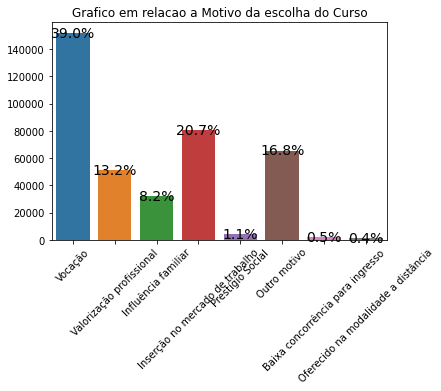

In [57]:
# Plotando variável por incetivado
total = float(len(dados_novo["QE_I25"]))
ax=sns.countplot(dados_novo["QE_I25"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=45)
plt.title("Grafico em relacao a Motivo da escolha do Curso")
plt.ylabel("")
plt.xlabel("")
plt.show()

Visualizar em grafico as notas atribuidos aos participantes

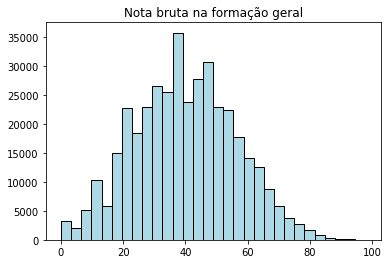

In [58]:
# Plotando a variável nota bruta
plt.hist(dados_novo["NT_FG"],bins=30,edgecolor = "black",color="lightblue")
plt.title("Nota bruta na formação geral")
plt.show()

CONCLUSÕES

A Região sudeste possui o maior número de participantes, já a região norte detém o menor número de participantes no ENADE. O número de participantes do Estado de São Paulo é muito superior que os demais. Notamos, também, um grande número de inscrições nos estados do Rio de Janeiro e os da região sul (RS,SC e PR). A média de idade é 27 anos, com a mínima 18 e máxima 86 anos. Ademais, 53.8% dos participantes são do sexo feminino e 46.2% são do sexo masculinos. Quando observamos a variável estado civil, notamos que 75% dos participantes são solteiros. Metade dos participantes são autodeclarados brancos (50.8%), e apenas 0.3% são autodeclarados indígenas. De modo geral, o percentual de mães e pais com ensino superior e ensino médio são equivalentes. No entanto, o percentual de mães com pós-graduação é de 11%, contra 5.9% dos pais com esse mesma grau de instrução. Quase a metade dos participantes tem renda familiar total de até 3 salários mínimos. Os participantes em média obtiveram 44 pontos de nota bruta da prova.

RELACIONANDO NOTA COM DEMAIS VARIÁVEIS

In [59]:
# Estabelendo parâmetros outliers e mean
flierprops = dict(marker='o', markerfacecolor='grey', markersize=8,
                  linestyle='none')
meanprops = dict(marker='o', markerfacecolor='white', markersize=12,
                 markeredgecolor='red')

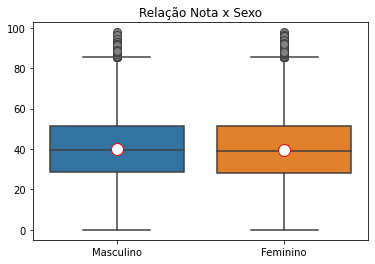

In [60]:
# Plotando relação entre nota x sexo
sns.boxplot(y="NT_FG",x="TP_SEXO",data=dados_novo,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Sexo")
plt.ylabel("")
plt.xlabel("")
plt.show()

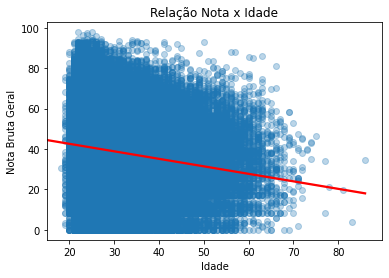

In [61]:
# Plotando relação entre nota x idade
sns.regplot(y="NT_FG", x="NU_IDADE", data=dados_novo,line_kws={"color": "red"},scatter_kws={'alpha':0.3})
plt.title("Relação Nota x Idade")
plt.xlabel("Idade")
plt.ylabel("Nota Bruta Geral")
plt.xlim(15)
plt.show()

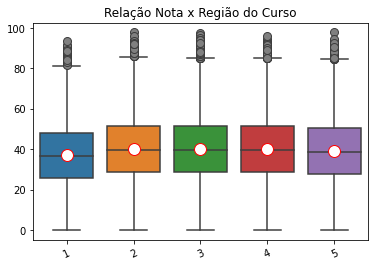

In [62]:
# Plotando relação entre nota x região do curso
sns.boxplot(y="NT_FG",x="CO_REGIAO_CURSO",data=dados_novo,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Região do Curso")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

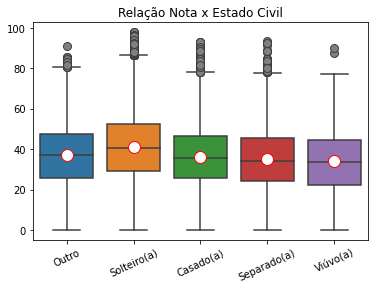

In [63]:
# Plotando relação entre nota x estado civil
sns.boxplot(y="NT_FG",x="QE_I01",data=dados_novo,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Estado Civil")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

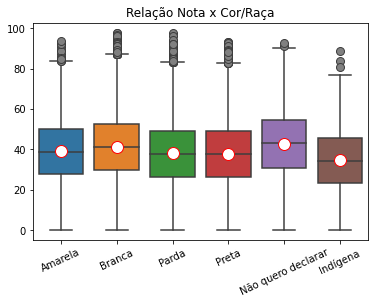

In [64]:
# Plotando relação entre nota x cor/raça
sns.boxplot(y="NT_FG",x="QE_I02",data=dados_novo,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Cor/Raça")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

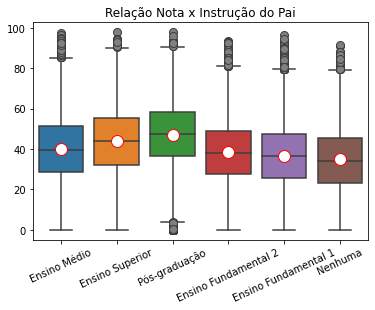

In [65]:
# Plotando relação entre nota x instrução do pai
sns.boxplot(y="NT_FG",x="QE_I04",data=dados_novo,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Instrução do Pai")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

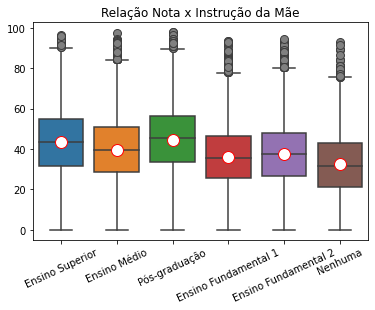

In [66]:
# Plotando relação entre nota x instrução da mãe
sns.boxplot(y="NT_FG",x="QE_I05",data=dados_novo,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Instrução da Mãe")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

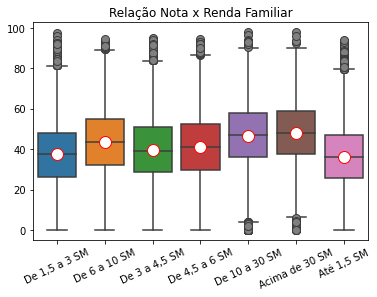

In [67]:
# Plotando relação entre nota x renda familiar
sns.boxplot(y="NT_FG",x="QE_I08",data=dados_novo,showmeans=True,
            meanprops=meanprops,flierprops=flierprops)
plt.title("Relação Nota x Renda Familiar")
plt.xticks(rotation=25)
plt.ylabel("")
plt.xlabel("")
plt.show()

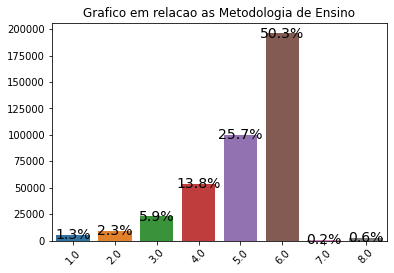

In [70]:
# Plotando variável por incetivado
total = float(len(dados_novo["QE_I29"]))
ax=sns.countplot(dados_novo["QE_I29"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=45)
plt.title("Grafico em relacao as Metodologia de Ensino")
plt.ylabel("")
plt.xlabel("")
plt.show()

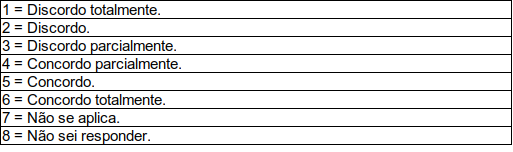

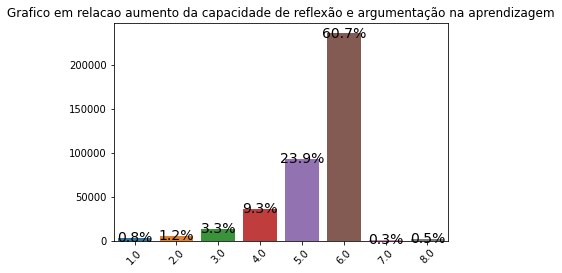

In [71]:
# Plotando variável por incetivado
total = float(len(dados_novo["QE_I33"]))
ax=sns.countplot(dados_novo["QE_I33"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=45)
plt.title("Grafico em relacao aumento da capacidade de reflexão e argumentação na aprendizagem")
plt.ylabel("")
plt.xlabel("")
plt.show()

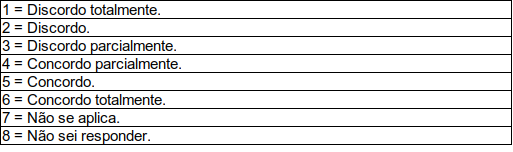

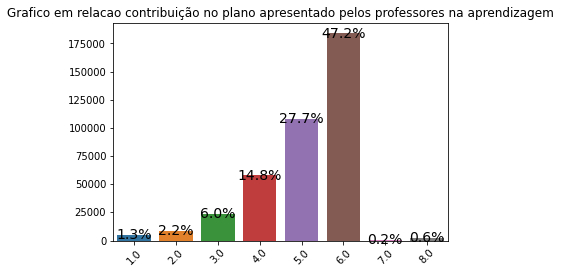

In [72]:
# Plotando variável por incetivado
total = float(len(dados_novo["QE_I38"]))
ax=sns.countplot(dados_novo["QE_I38"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=45)
plt.title("Grafico em relacao contribuição no plano apresentado pelos professores na aprendizagem")
plt.ylabel("")
plt.xlabel("")
plt.show()

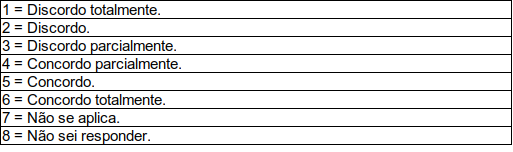

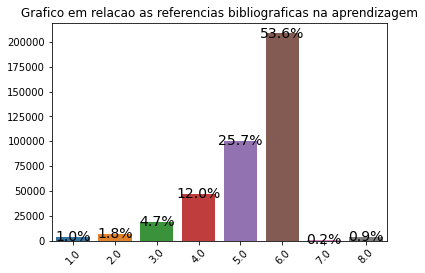

In [73]:
# Plotando variável por incetivado
total = float(len(dados_novo["QE_I39"]))
ax=sns.countplot(dados_novo["QE_I39"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=45)
plt.title("Grafico em relacao as referencias bibliograficas na aprendizagem")
plt.ylabel("")
plt.xlabel("")
plt.show()

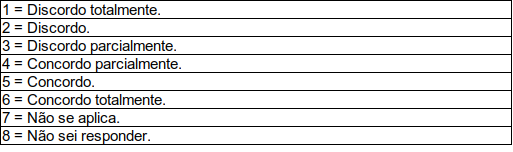

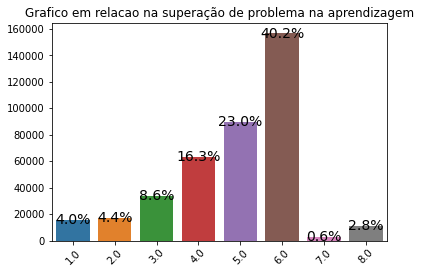

In [74]:
# Plotando variável por incetivado
total = float(len(dados_novo["QE_I40"]))
ax=sns.countplot(dados_novo["QE_I40"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=14,ha="center",va="center")
plt.xticks(rotation=45)
plt.title("Grafico em relacao na superação de problema na aprendizagem")
plt.ylabel("")
plt.xlabel("")
plt.show()

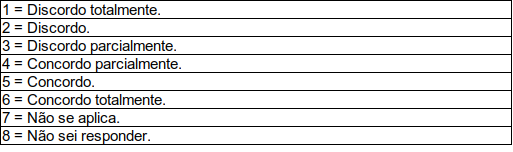

CONCLUSÕES DA EXPLORAÇÃO DE DADOS

A nota média das mulheres é 44.6, já a dos homens é de 43.3 pontos. Há uma correlação negativa entre idade e nota bruta. Deste modo, quanto maior a idade do participante, menor sua nota em média. Por exemplo, a média das notas aos 20 anos é 46.4, já aos 50 anos é 36.8 pontos. Em média, os participantes da região sul obtiveram as maiores notas, com 45.7 pontos. No entanto, o estado do Espírito Santo possui a maior média, com 48.8 pontos. O perfil geral dos participantes com as maiores notas é o seguinte: solteiro, autodeclarados brancos, os pais possuem pós-graduação e renda familiar alta.

# ANALISE PREDITIVA

Utlizando o modelo K-Modes para agrupar diferentes estudantes em relação ao vida socio-economico, realidade na aprendizagem e oportunidade recebida ao longo do seu ciclo.

A ideia por trás do algoritmo K-modes é encontrar os K modos (valores mais comuns) em cada atributo dos dados e usá-los como os centros dos clusters. Em seguida, os dados são atribuídos aos clusters baseados na distância entre os modos de cada cluster e os valores dos atributos dos dados. A fórmula para calcular a distância entre os modos de cada cluster e os valores dos atributos dos dados é a seguinte:

distância = 1 se o valor do atributo for diferente do modo do cluster
distância = 0 se o valor do atributo for igual ao modo do cluster

O processo é repetido iterativamente até que não haja mais mudanças nos clusters.

In [90]:
dados_amostra=dados_novo.sample(frac=.2)
dados_amostra=dados_amostra.head(5000)

In [91]:
data = np.array(dados_amostra)

Criamos uma instância do algoritmo K-modes em Python.

- O parâmetro n_clusters especifica o número de clusters que o algoritmo deve tentar formar nos dados. No caso dessa instância, o algoritmo tentará formar 12 clusters.

- O parâmetro init especifica o método de inicialização dos modos dos clusters. No caso dessa instância, o método de inicialização é o Huang, que seleciona os modos dos clusters de forma aleatória.

- O parâmetro n_init especifica o número de vezes que o algoritmo deve ser executado com diferentes conjuntos de modos iniciais. No caso dessa instância, o algoritmo será executado 5 vezes com diferentes conjuntos de modos iniciais.

- O parâmetro verbose especifica se o algoritmo deve exibir informações de saída durante o processo de agrupamento. No caso dessa instância, o algoritmo exibirá informações de saída.

In [92]:
# inicializamos o modelo k-modes com k = 2 clusters
km = KModes(n_clusters=12, init='Huang', n_init=5, verbose=1)

Inicializador a predição criando esses 12 grupos.

O método fit_predict() do objeto K-modes (km) ajusta os dados (data) ao modelo de agrupamento e prevê a qual cluster cada dado pertence. O resultado é armazenado na variável clusters.

In [93]:
# ajustamos o modelo aos nossos dados
clusters = km.fit_predict(data)
# os clusters são atribuídos como uma lista de números inteiros:
print(clusters)  # imprime: [0, 0, 1]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1993, cost: 42663.0
Run 1, iteration: 2/100, moves: 389, cost: 42663.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1402, cost: 42413.0
Run 2, iteration: 2/100, moves: 444, cost: 42234.0
Run 2, iteration: 3/100, moves: 58, cost: 42234.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1986, cost: 42062.0
Run 3, iteration: 2/100, moves: 99, cost: 42062.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2128, cost: 42548.0
Run 4, iteration: 2/100, moves: 1049, cost: 42216.0
Run 4, iteration: 3/100, moves: 151, cost: 42216.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1701, cost: 42776.0
Run 5, iteration: 2/100, moves: 30,

from sklearn import metrics é uma linha de código em Python que importa a biblioteca de métricas do pacote scikit-learn. A biblioteca de métricas do scikit-learn fornece uma série de funções para avaliar o desempenho de modelos de aprendizado de máquina.

- X=clusters atribui o valor da variável clusters a X. clusters é uma lista de inteiros que indica a qual cluster cada exemplo do conjunto de dados pertence.

- n_clusters_ = len(set(X)) - (1 if -1 in X else 0) conta o número de clusters presentes na lista X, ignorando o valor -1 se ele estiver presente. O valor -1 pode ser usado para indicar exemplos que são considerados ruído (isto é, que não pertencem a nenhum cluster).

- n_noise_ = list(X).count(-1) conta o número de exemplos que são considerados ruído na lista X.

As linhas de código a seguir exibem o número estimado de clusters e o número estimado de exemplos de ruído.

In [94]:
from sklearn import metrics

X=clusters
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(X)) - (1 if -1 in X else 0)
n_noise_ = list(X).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 12
Estimated number of noise points: 0


O atributo labels_ do objeto K-modes (km) armazena os rótulos de cluster atribuídos a cada exemplo do conjunto de dados. Esses rótulos são números inteiros que indicam a qual cluster cada exemplo pertence. Por exemplo, se o conjunto de dados tiver 10 exemplos e o algoritmo K-modes tiver sido executado com n_clusters=3, então o atributo labels_ conterá uma lista com 10 elementos, onde cada elemento é um número inteiro de 0 a 2 que indica a qual cluster cada exemplo pertence.

A linha de código dados_amostra["cluster"] = km.labels_ adiciona os rótulos de cluster armazenados no atributo labels_ como uma nova coluna no DataFrame dados_amostra.

In [95]:
dados_amostra["cluster"] = km.labels_

Visualizar os dados com os grupos criado pelo K-Modes.

Notamos na ulitma coluna do dataset temos grupo criado com nome Cluster

In [96]:
dados_amostra.head(5)

,CO_UF_CURSO,CO_REGIAO_CURSO,NT_FG,NU_IDADE,TP_SEXO,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I08,QE_I11,QE_I25,QE_I29,QE_I33,QE_I37,QE_I38,QE_I39,QE_I40,cluster
238823,31,3,29.1,32,Masculino,Casado(a),Branca,A,Ensino Médio,Ensino Superior,De 6 a 10 SM,"Nenhum, embora meu curso não seja gratuito",Valorização profissional,6.0,5.0,5.0,5.0,5.0,4.0,11
346819,31,3,59.8,29,Feminino,Solteiro(a),Branca,A,Ensino Médio,Ensino Superior,"De 1,5 a 3 SM","Nenhum, pois meu curso é gratuito",Outro motivo,5.0,3.0,3.0,3.0,4.0,2.0,2
232369,33,3,17.2,29,Feminino,Solteiro(a),Branca,A,Ensino Fundamental 1,Ensino Fundamental 2,"De 3 a 4,5 SM","Nenhum, embora meu curso não seja gratuito",Vocação,4.0,5.0,4.0,4.0,4.0,4.0,4
58153,42,4,56.2,29,Feminino,Solteiro(a),Branca,A,Ensino Médio,Ensino Superior,"De 3 a 4,5 SM","Nenhum, pois meu curso é gratuito",Valorização profissional,4.0,2.0,1.0,4.0,6.0,1.0,4
136007,35,3,56.5,23,Masculino,Solteiro(a),Branca,A,Ensino Médio,Ensino Médio,"De 3 a 4,5 SM",ProUni integral,Outro motivo,5.0,6.0,6.0,6.0,6.0,5.0,0


Transformamos os dados em valor numerico para verificar a semelhanca entre diferentes grupo criado no algoritmo KModes

In [105]:
estado = {'A': 1,'B': 2, 'C': 3, 'D': 4, 'E': 5}
raca = {'A': 1,'B': 2, 'C': 3, 'D': 4,'F': 5}
nacionalidade = {'A': 1,'B': 2, 'C': 3}
sexo = {'M': 1,'F': 2}
pai = {'A': 1,'B': 2, 'C': 3, 'D': 4,'F': 5}
mae = {'A': 1,'B': 2, 'C': 3, 'D': 4,'F': 5}
rendimento = {'A': 1,'B': 2, 'C': 3, 'D': 4,'F': 5,'G': 6}
bolsa = {'A': 1,'B': 2, 'C': 3, 'D': 4,'F': 5,'G': 6,'H': 7,'I': 8,'J': 9,'K': 10}
motivo = {'A': 1,'B': 2, 'C': 3, 'D': 4,'F': 5,'G': 6,'H': 7}
dados_amostra['QE_I01'] = dados_amostra['QE_I01'].map(estado)
dados_amostra['QE_I02'] = dados_amostra['QE_I02'].map(raca)
dados_amostra['QE_I03'] = dados_amostra['QE_I03'].map(nacionalidade)
dados_amostra['QE_I04'] = dados_amostra['QE_I04'].map(pai)
dados_amostra['QE_I05'] = dados_amostra['QE_I05'].map(mae)
dados_amostra['QE_I08'] = dados_amostra['QE_I08'].map(rendimento)
dados_amostra['QE_I11'] = dados_amostra['QE_I11'].map(bolsa)
dados_amostra['QE_I25'] = dados_amostra['QE_I25'].map(motivo)
dados_amostra['TP_SEXO'] = dados_amostra['TP_SEXO'].map(sexo)

Heatmap é uma visualização de dados que representa valores numéricos em uma grade de cores. Cada célula da grade é colorida com uma cor que representa o valor numérico contido na célula. 

Heatmaps são frequentemente usados para visualizar matrizes de dados, onde cada linha e coluna representa uma dimensão do conjunto de dados e os valores nas células da grade representam medidas ou contagens para a combinação de linha/coluna específica.

Heatmaps são úteis para identificar padrões e tendências nos dados de maneira rápida e intuitiva. Eles são especialmente úteis para comparar valores em diferentes dimensões e para detectar outliers ou valores anômalos.

Essa é o nosso motivo por escolher essa visualização para ver os grupos mais proximo

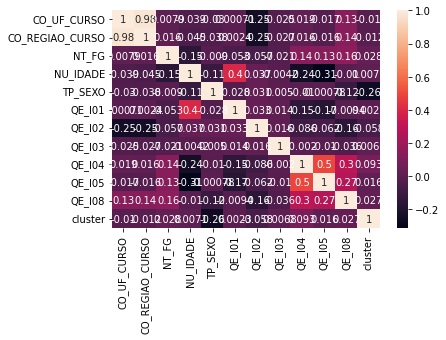

In [ ]:
sns.heatmap(dados_amostra.corr(), annot=True) #annot mostra os coeficientes da matriz

dados_grupo=dados_amostra.groupby('cluster') é uma linha de código em Python que agrupa os dados de um DataFrame de pandas chamado dados_amostra por um determinado atributo. Neste caso, o atributo é 'cluster', que representa os rótulos de cluster gerados pelo algoritmo K-modes.

A função groupby() do DataFrame de pandas retorna um objeto GroupBy, que permite aplicar funções agregadas aos grupos de dados criados.

dados_grupo.describe() é uma linha de código que aplica a função describe() ao objeto GroupBy dados_grupo. A função describe() gera um resumo estatístico dos dados em cada grupo, incluindo a contagem, a média, o desvio padrão, os quartis e os valores mínimo e máximo.

In [ ]:
dados_grupo=dados_amostra.groupby('cluster')
dados_grupo.describe()

CO_UF_CURSO                                                      \
              count       mean        std   min   25%   50%   75%   max   
cluster                                                                   
0             476.0  40.355042  13.651373  11.0  28.0  50.0  52.0  53.0   
1             593.0  28.593592   9.856149  11.0  23.0  26.0  33.0  53.0   
2             494.0  33.028340   5.246384  11.0  33.0  33.0  35.0  53.0   
3             724.0  32.316298   8.787846  11.0  31.0  31.0  35.0  53.0   
4             477.0  28.331237   9.196006  11.0  24.0  28.0  29.0  53.0   
5             461.0  39.865510   6.316242  11.0  41.0  42.0  43.0  53.0   
6             420.0  33.907143   4.915850  11.0  35.0  35.0  35.0  53.0   
7             236.0  40.487288   6.503342  11.0  41.0  42.0  42.0  53.0   
8              85.0  26.011765   7.906438  11.0  23.0  25.0  31.0  42.0   
9             273.0  33.073260   7.597536  11.0  32.0  35.0  35.0  53.0   
10            660.0  33.436364   5.157655  11.0  33.0  35.0  35.0  53.0   
11            101.0  26.663366   6.358109  13.0  26.0  26.0  26.0  53.0   

        CO_REGIAO_CURSO            ...   NT_FG       NU_IDADE             \
                  count      mean  ...     75%   max    count       mean   
cluster                            ...                                     
0                 476.0  3.771008  ...  51.725  85.2    476.0  25.936975   
1                 593.0  2.494098  ...  51.200  88.4    593.0  27.028668   
2                 494.0  3.000000  ...  51.400  80.6    494.0  27.028340   
3                 724.0  2.975138  ...  48.200  88.0    724.0  29.429558   
4                 477.0  2.278826  ...  51.200  85.6    477.0  27.507338   
5                 461.0  3.754881  ...  53.100  80.6    461.0  27.444685   
6                 420.0  2.964286  ...  56.425  89.6    420.0  26.361905   
7                 236.0  3.826271  ...  52.475  82.2    236.0  26.144068   
8                  85.0  2.258824  ...  46.500  75.2     85.0  33.564706   
9                 273.0  2.901099  ...  48.000  81.0    273.0  29.000000   
10                660.0  2.936364  ...  49.725  83.6    660.0  27.053030   
11                101.0  2.118812  ...  55.000  75.6    101.0  26.584158   

                                                 
              std   min   25%   50%   75%   max  
cluster                                          
0        5.542963  20.0  22.0  24.0  27.0  78.0  
1        5.633292  20.0  24.0  26.0  28.0  58.0  
2        5.893511  20.0  24.0  25.0  28.0  55.0  
3        8.028942  20.0  23.0  27.0  34.0  59.0  
4        6.140379  21.0  24.0  25.0  30.0  53.0  
5        5.912007  21.0  24.0  25.0  29.0  59.0  
6        5.807367  20.0  23.0  25.0  27.0  61.0  
7        5.892332  21.0  23.0  23.0  27.0  55.0  
8        7.352432  21.0  30.0  31.0  37.0  55.0  
9        7.099606  21.0  24.0  26.0  33.0  56.0  
10       6.046249  20.0  23.0  24.0  29.0  63.0  
11       5.441080  20.0  23.0  26.0  27.0  55.0  

[12 rows x 32 columns]

sns.pairplot(dados_amostra,'TP_SEXO',height=2) é uma linha de código em Python que cria um gráfico de dispersão de pares de atributos de um DataFrame de pandas chamado dados_amostra.

O gráfico de dispersão de pares é uma visualização de dados que mostra a relação entre todas as pares de atributos numéricos do conjunto de dados. Ele é útil para explorar a correlação entre os atributos e detectar padrões e tendências nos dados.

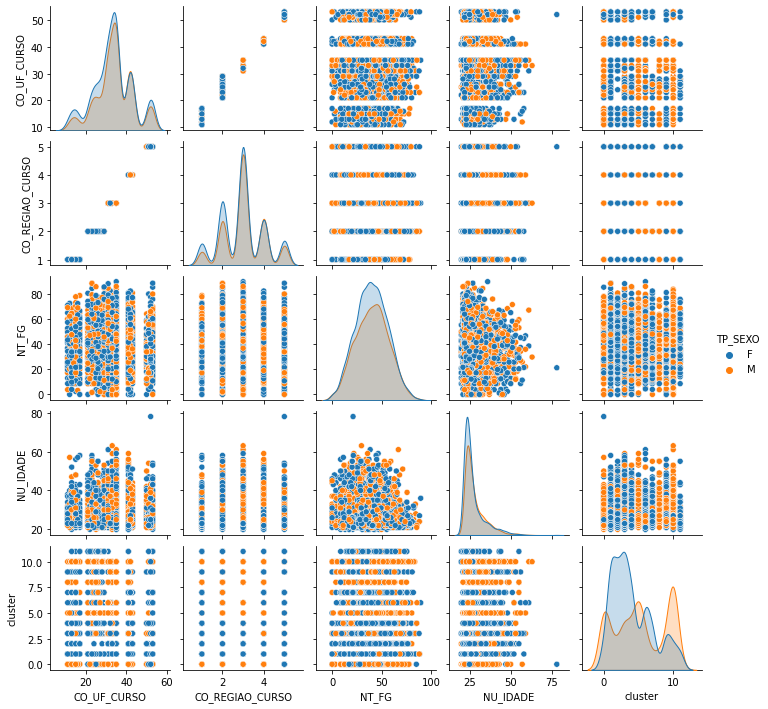

In [ ]:
sns.pairplot(dados_amostra,'TP_SEXO',height=2)

sns.pairplot(dados_amostra,'QE_I02',height=2) é uma linha de código em Python que cria um gráfico de dispersão de pares de atributos de um DataFrame de pandas chamado dados_amostra.

O gráfico de dispersão de pares é uma visualização de dados que mostra a relação entre todas as pares de atributos numéricos do conjunto de dados. Ele é útil para explorar a correlação entre os atributos e detectar padrões e tendências nos dados.

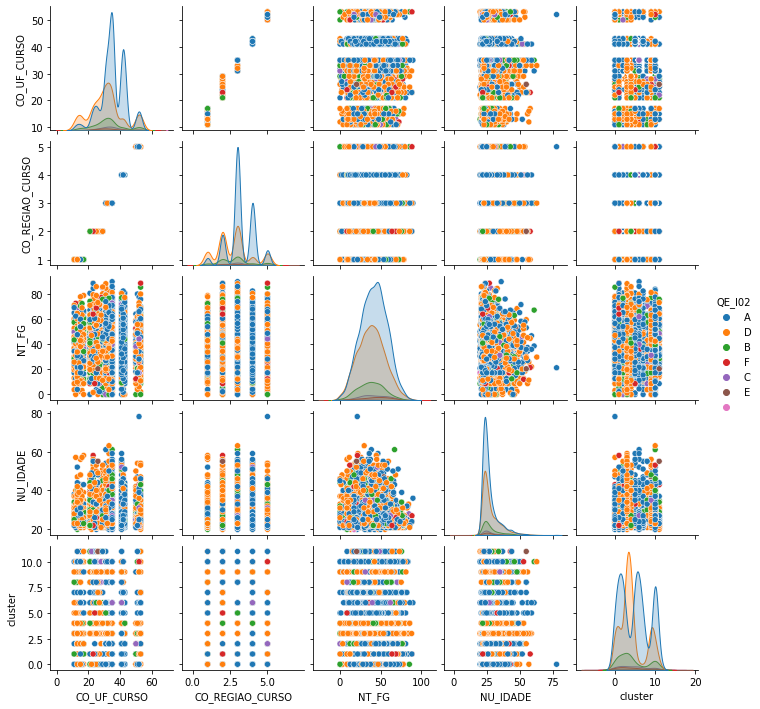

In [ ]:
sns.pairplot(dados_amostra,'QE_I02',height=2)

sns.pairplot(dados_amostra,'QE_I05',height=2) é uma linha de código em Python que cria um gráfico de dispersão de pares de atributos de um DataFrame de pandas chamado dados_amostra.

O gráfico de dispersão de pares é uma visualização de dados que mostra a relação entre todas as pares de atributos numéricos do conjunto de dados. Ele é útil para explorar a correlação entre os atributos e detectar padrões e tendências nos dados.

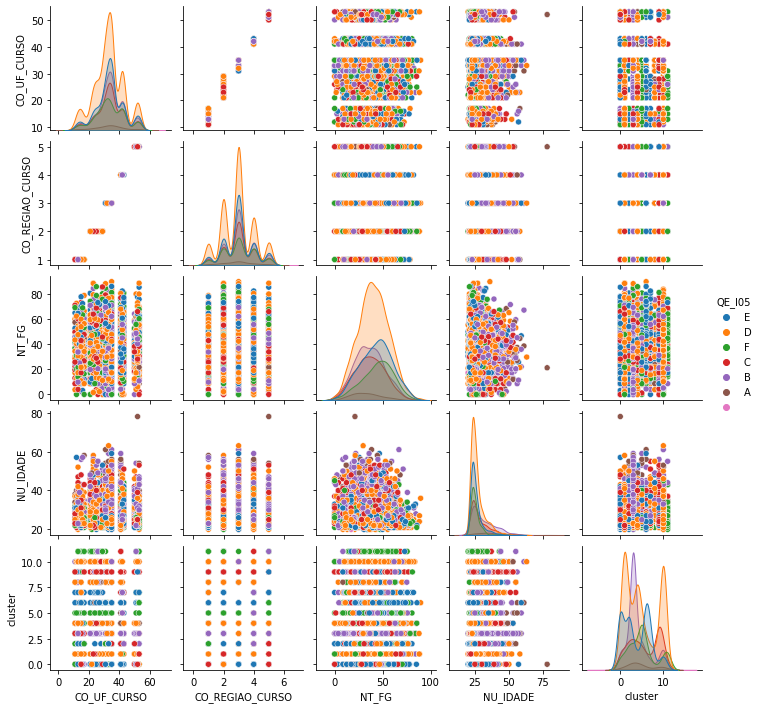

In [ ]:
sns.pairplot(dados_amostra,'QE_I05',height=2)

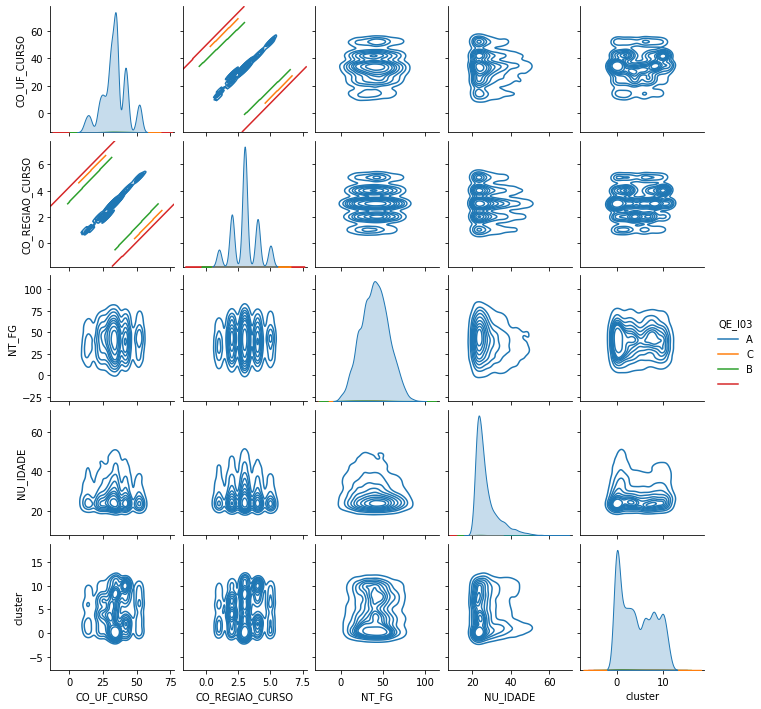

In [ ]:
sns.pairplot(dados_amostra,'QE_I03',height=2,kind='kde')

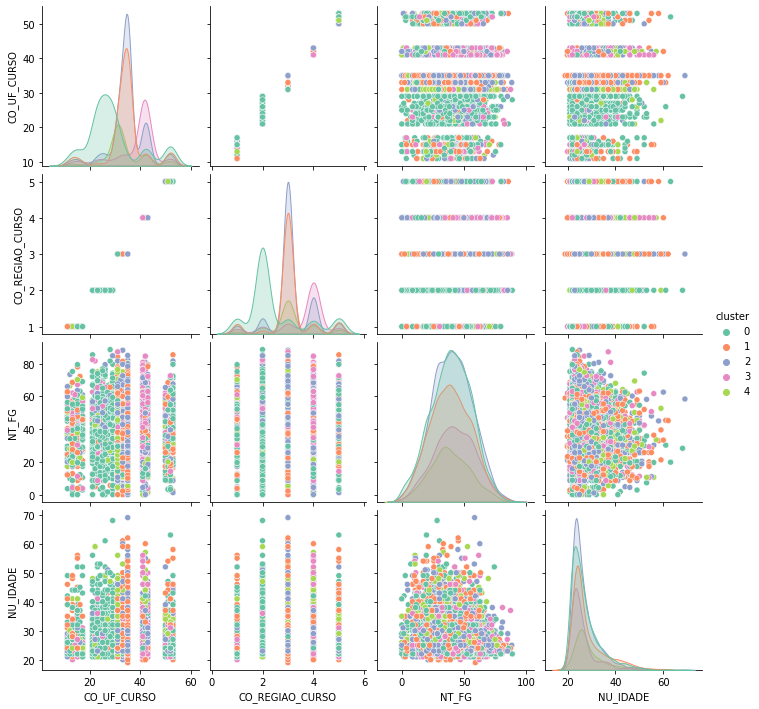

In [ ]:
sns.pairplot(dados_amostra, hue="cluster", palette="Set2", diag_kind="kde", height=2.5)